In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import pandas as pd
import dataset_utils
import torchxrayvision as xrv

/opt/homebrew/lib/python3.11/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


In [3]:
img = xrv.utils.load_image("../tests/00027426_000.png")

In [4]:
transforms = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                             xrv.datasets.XRayResizer(224)])

In [5]:
img = transforms(img)

In [6]:
# ae = xrv.baseline_models.medical_mae.models_mae.mae_vit_small_patch16_dec512d2b()
# weights = torch.load("/Users/ieee8023/.torchxrayvision/models_data/vit-s_CXR_0.3M_mae.pth", map_location=torch.device('cpu'))

In [7]:
ae = xrv.baseline_models.medical_mae.models_mae.mae_vit_base_patch16_dec512d8b()
weights = torch.load("/Users/ieee8023/.torchxrayvision/models_data/vit-b_CXR_0.5M_mae.pth", map_location=torch.device('cpu'))

In [8]:
weights['args']

Namespace(batch_size=256, epochs=800, accum_iter=1, model='mae_vit_base_patch16_dec512d8b', input_size=224, mask_ratio=0.9, norm_pix_loss=False, weight_decay=0.05, lr=0.0012, blr=0.00015, min_lr=0.0, warmup_epochs=40, data_path='/datasets01/imagenet_full_size/061417/', output_dir='./work_dirs/pretrain_exp71_chexpert_nih_mimic_vit_base_800e_224_mask90_random_RRC_bs2048_e1/', log_dir='./work_dirs/pretrain_exp71_chexpert_nih_mimic_vit_base_800e_224_mask90_random_RRC_bs2048_e1/', device='cuda', seed=0, resume='', start_epoch=0, num_workers=8, pin_mem=True, world_size=8, local_rank=-1, dist_on_itp=False, dist_url='env://', train_list=None, random_resize_range=[0.5, 1.0], fixed_lr=False, mask_strategy='random', weight_range=[0.1, 1.0], heatmap_binary_threshold=None, repeated_aug=False, datasets_names=['chexpert', 'chestxray_nih', 'mimic_cxr'], rank=0, gpu=0, distributed=True, dist_backend='nccl')

In [9]:
ae.load_state_dict(weights['model'])

<All keys matched successfully>

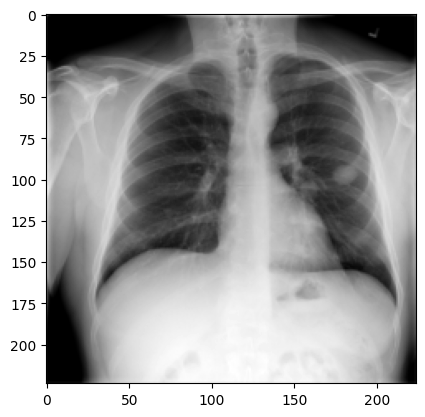

In [10]:
plt.imshow(img[0], cmap="grey")

In [11]:
x = torch.from_numpy(img[None,...]).repeat(1, 3, 1, 1)
# currently between -1024, 1024

x = (x + 1024) / 2048
# now between [0,1] for transforms.Normalize

x = torchvision.transforms.Normalize([0.5056, 0.5056, 0.5056], [0.252, 0.252, 0.252])(x)

x.min(), x.max()

(tensor(-2.0063), tensor(1.7184))

In [12]:
with torch.no_grad():
    o = ae.forward(x, 0)

In [13]:
o[1].min(), o[1].max()

(tensor(-1.7277), tensor(1.4590))

In [14]:
oo = ae.unpatchify(o[1])

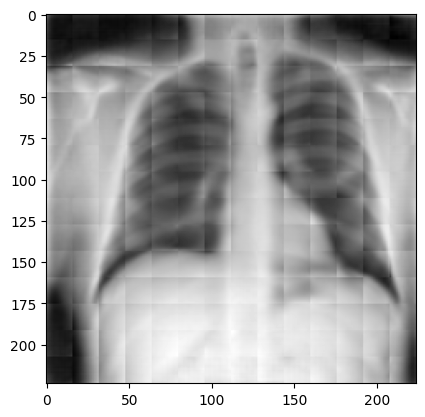

In [15]:
plt.imshow(oo[0].mean(0), cmap="grey");